In [1]:
import multiprocessing.popen_spawn_posix
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
c = Client(cluster)
c

/scratch/cnt0024/ige2071/aalbert/conda/caledo/lib/python3.9/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43824 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:45247 Dashboard: http://127.0.0.1:43824/status,Cluster Workers: 8 Cores: 56 Memory: 270.19 GB


In [2]:
import xarray as xr

In [3]:
%time ds=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested',chunks={'x':1000,'y':500})

CPU times: user 664 ms, sys: 329 ms, total: 993 ms
Wall time: 4.81 s


In [23]:
dscoord=xr.open_dataset('/store/brodeau/TROPICO12/TROPICO12.L125-I/coordinates_TROPICO12.nc')

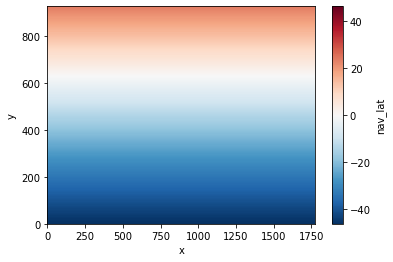

In [24]:
dscoord.nav_lat.plot()

In [4]:
ds

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 1464, x: 1775, y: 926)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(124,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2012-01-01T03:00:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    mldr10_1              (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    rho_air               (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    sos                   (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    tos                   (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    windsp                (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    zos                   (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
Attributes:
    name:         /scratch/cnt0024/hmg2840/lbrodeau/NEMO/TROPICO12/TROPICO12_...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Feb-02 14:29:06 GMT
    uuid:         92ff3e63-f353-4473-b815-adcc7ad76676
    history:      Tue Feb  2 21:52:37 2021: ncks -4 -L 7 --cnk_dmn x,1775 --c...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...

In [5]:
# General and file management
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import dask.array as da

#For the plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker

import cartopy
cartopy.config['pre_existing_data_dir'] = '/scratch/cnt0024/hmg2840/albert7a/DEV/git/cartopy_data'
import cartopy.crs as ccrs
import cmocean

import warnings
warnings.filterwarnings('ignore')

#Jupyter magics
%matplotlib inline

In [6]:
central_lon, central_lat = 180, -10
pj= ccrs.Orthographic(central_lon, central_lat)

fig=plt.figure(figsize=(15,10))
ax=plt.subplot(1,2,1,projection=pj)
# Plot cosmetics
ax.coastlines(resolution="10m")
ax.set_extent([140,300,-50,30])
ax.gridlines(draw_labels=False, crs=pj, xlocs=[120,140,160,180,200,220,240])
gl=ax.gridlines(draw_labels=True, crs=pj, xlocs=[120,140,160,180,-160,-140,-120])
#gl = ax.gridlines(crs=pj, draw_labels=True, linewidth=1, color='black', alpha=0.2, linestyle='--')
label_style= {'size' : 12, 'color' : 'black'}
gl.xlabel_style = label_style
gl.labels_top = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20,dtype=float))
gl.ylabel_style = label_style
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator(np.arange(-50,30,10,dtype=float))

# Map of amplitude, contours of phase
cs = plt.pcolormesh(ds.nav_lon, ds.nav_lat, ds.tos.mean(dim='time_counter'),transform=pj,cmap=cmocean.cm.thermal,
                    vmin=10,vmax=30)
cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.75,label='deg C')


TypeError: Cannot label Orthographic gridlines. Only PlateCarree gridlines are currently supported.

<Figure size 1080x720 with 2 Axes>

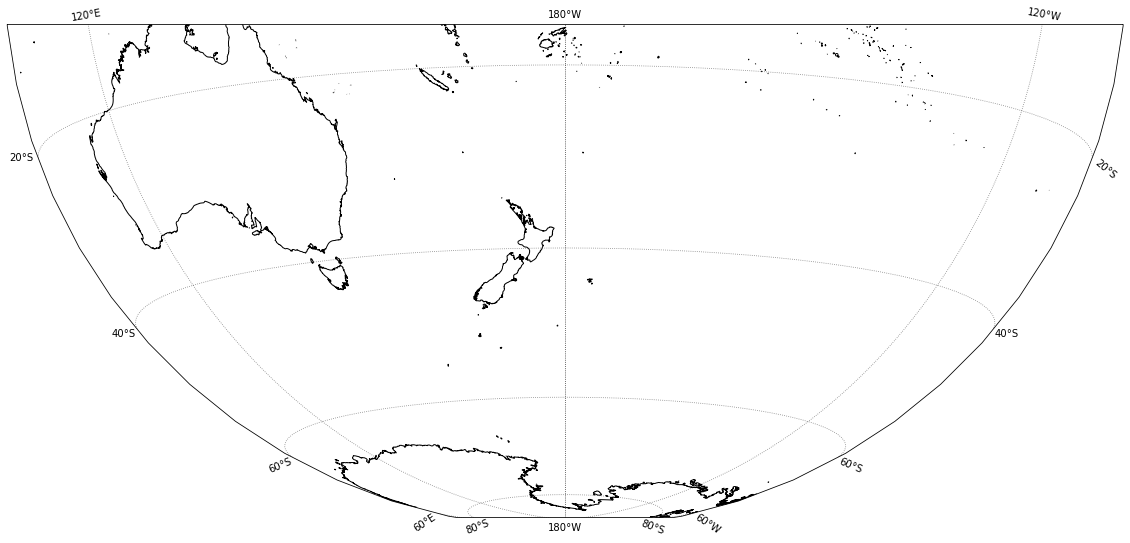

In [15]:
central_lon, central_lat = 180, -10
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig=plt.figure(figsize=(20,15))
#ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=180,
                                                        central_latitude=-10))
ax.set_extent((-90, 90, -30, 50))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
#gl.top_labels = False
#gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)


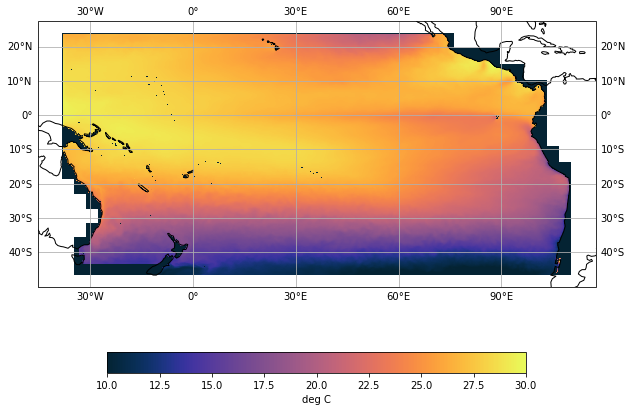

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# cartopy-0.17.0 pyshp-2.1.0

cm = 180
proj = ccrs.PlateCarree(central_longitude=cm)
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines()

# original ax.set_extent((-120, 120, -45, 45)) ?
# Need longitude extent from -60 to +60 on PlateCarree(central_longitude=180)
minlon = -40 + cm
maxlon = +120 + cm
#ax.set_extent([minlon, maxlon, -50, 30], ccrs.PlateCarree())
ax.gridlines(draw_labels=True, crs=proj)

cs = plt.pcolormesh(dscoord.nav_lon-cm, dscoord.nav_lat, ds.tos.mean(dim='time_counter'),transform=proj,cmap=cmocean.cm.thermal,
                    vmin=10,vmax=30)
cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.75,label='deg C')
